borrowed from the excellent blog: https://vincentherrmann.github.io/blog/wasserstein/

In [1]:
#| include: false
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

P_r:


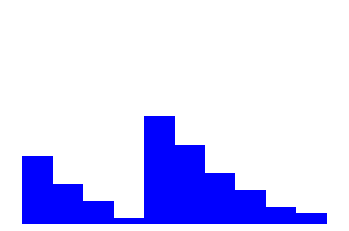

P_t:


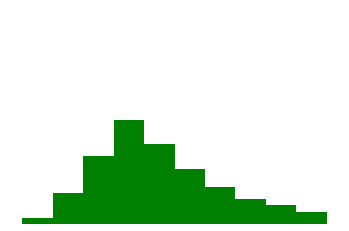

In [3]:
sz = 10

P_r = np.array([12,7,4,1,19,14,9,6,3,2])
P_t = np.array([1,5,11,17,13,9,6,4,3,2])
P_r = P_r / np.sum(P_r)
P_t = P_t / np.sum(P_t)

plt.bar(range(l), P_r, 1, color='blue', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_r:")
plt.show()

plt.bar(range(l), P_t, 1, color='green', alpha=1)
plt.axis('off')
plt.ylim(0, 0.5)
print("P_t:")
plt.show()

The primal moving earth problem:
1. $D$ is the distance
2. $x$, the solution, not shown in below, is the transport plan, that is $\gamma$ in the blog.
3. $A$ is an (2*sz, szXsz) tensor, its transpose indicates whether the transport plan involving moving mass from position $i$ to position $j$. (Check the blog for details)
4. $b$ is the original distriubtion, which satisfies marginal $x$ is $b$.

In [5]:
# the primal moving earth problem

D = np.ndarray(shape=(sz, sz))

for i in range(sz):
    for j in range(sz):
        D[i,j] = abs(i-j)
        
D

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [1., 0., 1., 2., 3., 4., 5., 6., 7., 8.],
       [2., 1., 0., 1., 2., 3., 4., 5., 6., 7.],
       [3., 2., 1., 0., 1., 2., 3., 4., 5., 6.],
       [4., 3., 2., 1., 0., 1., 2., 3., 4., 5.],
       [5., 4., 3., 2., 1., 0., 1., 2., 3., 4.],
       [6., 5., 4., 3., 2., 1., 0., 1., 2., 3.],
       [7., 6., 5., 4., 3., 2., 1., 0., 1., 2.],
       [8., 7., 6., 5., 4., 3., 2., 1., 0., 1.],
       [9., 8., 7., 6., 5., 4., 3., 2., 1., 0.]])

In [6]:
A_r = np.zeros((sz, sz, sz))
A_t = np.zeros((sz, sz, sz))

for i in range(sz):
    for j in range(sz):
        A_r[i, i, j] = 1
        A_t[i, j, i] = 1

A = np.concatenate((A_r.reshape((sz, sz**2)), A_t.reshape((sz, sz**2))), axis=0)
print("A: \n", A, "\n")

b = np.concatenate((P_r, P_t), axis=0)
c = D.reshape((l**2))

A: 
 [[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]] 



EMD:  0.7062374245525824 

Gamma:


/tmp/ipykernel_9198/2200447476.py:4: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  opt_res = linprog(c, A_eq=A, b_eq=b, bounds=[0, None])


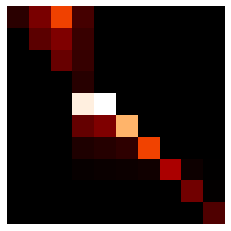

D:


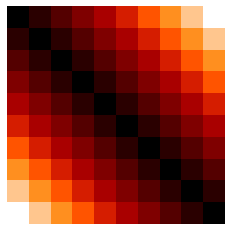

In [7]:
from scipy.optimize import linprog
from matplotlib import cm

opt_res = linprog(c, A_eq=A, b_eq=b, bounds=[0, None])
emd = opt_res.fun
gamma = opt_res.x.reshape((l, l))
print("EMD: ", emd, "\n")

plt.imshow(gamma, cmap=cm.gist_heat, interpolation='nearest')
plt.axis('off')
print("Gamma:")
plt.show()

plt.imshow(D, cmap=cm.gist_heat, interpolation='nearest')
plt.axis('off')
print("D:")
plt.show()

dual EMD:  0.7062374154981319
f: 
 [ 0.91470897 -0.08529103 -1.08529103 -2.08529105 -1.08529102 -0.08529102
  0.91470897  1.91470893  0.91470901 -0.085291  ]


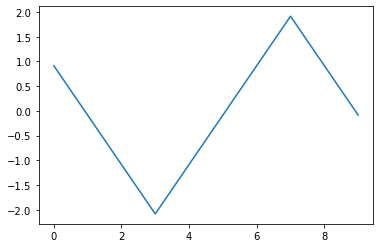

g: 
 [ 0.91470897 -0.08529103 -1.08529103 -2.08529105 -1.08529102 -0.08529102
  0.91470897  1.91470893  0.91470901 -0.085291  ]


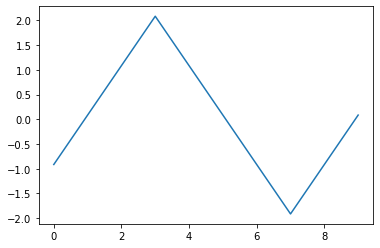

In [8]:
# linprog() can only minimize the cost, because of that
# we optimize the negative of the objective. Also, we are
# not constrained to nonnegative values.
opt_res = linprog(-b, A.T, c, bounds=(None, None))

emd = -opt_res.fun
f = opt_res.x[0:sz]
g = opt_res.x[sz:]

#print(dual_result)
print("dual EMD: ", emd)

print("f: \n", f)
plt.plot(range(sz), f)
plt.show()


print("g: \n", f)
plt.plot(range(sz), g)
plt.show()

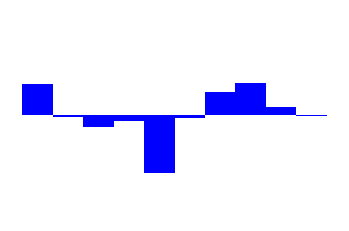

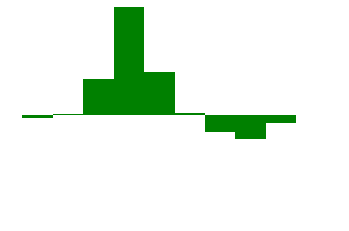

emd:  0.7062374154981317


In [9]:
plt.bar(range(sz), np.multiply(P_r, f), 1, color='blue', alpha=1)
plt.axis('off')
plt.ylim(-0.5, 0.5)
plt.show()

plt.bar(range(sz), np.multiply(P_t, g), 1, color='green', alpha=1)
plt.axis('off')
plt.ylim(-0.5, 0.5)
plt.show()

#check sum
emd = np.sum(np.multiply(P_r, f)) + np.sum(np.multiply(P_t, g))
print("emd: ", emd)

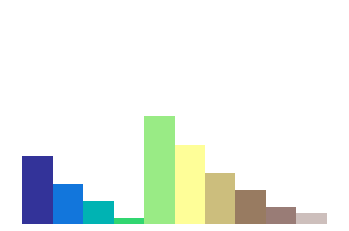

In [19]:
import matplotlib.colors as colors

cNorm = colors.Normalize(vmin=0, vmax=l)
colorMap = cm.ScalarMappable(norm=cNorm, cmap=cm.terrain)

current_bottom = np.zeros(sz)

r = range(sz)

for i in r:
    plt.bar(r, gamma[r, i], 1, 
            color=colorMap.to_rgba(r), 
            bottom=current_bottom)
    current_bottom = current_bottom + gamma[r, i]

plt.axis('off')
plt.ylim(0, 0.5)
plt.show()

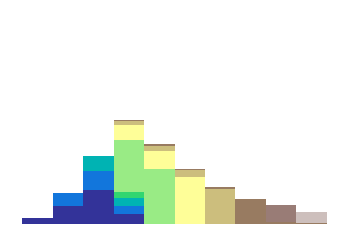

In [17]:
current_bottom = np.zeros(sz)
r = range(sz)

for i in r:
    plt.bar(r, gamma[i, r], 1, color=colorMap.to_rgba(i), bottom=current_bottom)
    current_bottom = current_bottom + gamma[i, r]

plt.axis('off')
plt.ylim(0, 0.5)
plt.show()